<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Parcial 03 - IA**

## **Outline**

1. [Ejercicio 1.](#eje1)
2. [Ejercicio 2.](#eje2)
3. [Ejercicio 3.](#eje3)
4. [Ejercicio 4.](#eje4)

In [2]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "IA1-20221-H2" #@param {type:"string"}
assignment_id = group_id +'.parcial-3-20221'
student_id = "2182689" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [3]:
 #@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [4]:
#@title **Import libraries**

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "ai-uis-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/ai-uis-student


# **Ejercicio 1. Unsupervised**  <a name="eje1"></a>

Implemente una función que reciba como parametros el número de clusters `nc` y el número de componentes principales `P_comp` para el ajuste de los algoritmos `AgglomerativeClustering`, `SpectralClustering` y el número de componentes del algoritmo PCA, respectivamente. La función debe calcular los `P_comp` componentes principales del dataset de `sklearn` que se denomina `make_classification`. 

Una vez obtenidos los `P_comp` componentes, transforme todas las características del dataset hacia estos componentes, es decir, ahora tendrá únicamente `P_comp` características.

Utilizando estas *PCA-features* entrene un estimador `AgglomerativeClustering` con parámetros `n_clusters=nc` y un estimador `SpectralClustering` con `n_clusters=nc` y `random_state=21`.

La función debe:
- **Devolver** los puntos de `make_classification` originales, **sin ser modificados** por el algoritmo PCA.
- **Devolver** los puntos de `make_classification` **después de ser transformados** por el PCA.
- **Devolver** el ground truth (las etiquetas) de los puntos.
- **Devolver** el vector de etiquetas del objeto `AgglomerativeClustering`.
- **Devolver** el vector de etiquetas del objeto `SpectralClustering`.
- **Devolver** el objeto `AgglomerativeClustering` entrenado
- **Devolver** el objeto `SpectralClustering` entrenado
- **Devolver** el objeto PCA entrenado

En cuanto al dataset `make_classification` genere puntos con los siguientes parametros:

- 1500 elementos
- `n_features=12`
- `random_state=21`

<br>

Referencia de la función [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

Referencia de la función [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering)

Referencia make_classification [ https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification ]

In [9]:
#@title **code student**
def function_20221_p03_01(nc, P_comp):
  import numpy as np
  from sklearn.decomposition import PCA
  from sklearn.cluster import AgglomerativeClustering
  from sklearn.cluster import SpectralClustering
  from sklearn.datasets import make_classification
  np.random.seed(21)
  X, y = make_classification(n_samples=1500, n_features=12,random_state=21)
  p = PCA(n_components=P_comp)
  p.fit(X)
  dp = p.transform(X)
  ac = AgglomerativeClustering(n_clusters=nc).fit(dp)
  sc = SpectralClustering(n_clusters=nc, random_state=21).fit(dp)

  return X, dp, y, ac.labels_, sc.labels_, ac, sc, p

(1500, 12)


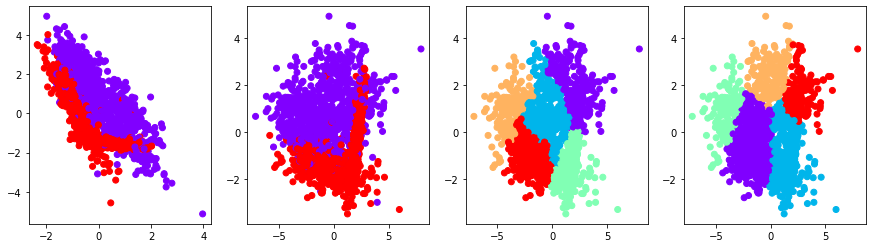

In [10]:
#@title **check your answer**
X, dp, y, kmeans_labels, DBS_labels, KMEANS_, DBS_, PCA_ = function_20221_p03_01(nc=5, P_comp=2)
print(X.shape)
plt.figure(figsize=(15,4))
plt.subplot(141);
plt.scatter(X[:,0],X[:,1], c=y, cmap='rainbow') 
plt.subplot(142);
plt.scatter(dp[:,0],dp[:,1], c=y, cmap='rainbow') 
plt.subplot(143);
plt.scatter(dp[:,0],dp[:,1], c=kmeans_labels, cmap='rainbow') 
plt.subplot(144);
plt.scatter(dp[:,0],dp[:,1], c=DBS_labels, cmap='rainbow') 
plt.show()

In [11]:
#@title **send your answer**
student_func_str = inspect.getsource(function_20221_p03_01)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

Score
	5
Message
	Well done. You got the highest score.


# **Ejercicio 2. Unsupervised**  <a name="eje2"></a>

Para este ejercicio utilizaremos la combinación de los datasets `make_blobs` y `make_gaussian_quantiles` para entrenar los estimadores `AgglomerativeClustering` y `DBSCAN`. 

Desarrolle una función que reciba el número de clusters `nc` y además:

- **Concatene** de manera **coherente** ambos datasets, es decir, concatene las variables `X1` y `X2`, y las etiquetas `y1` y `y2`.<br>
Use el valor del parámetro `axis` que **garantice** esa coherencia.
- El nuevo dataset será almacenado en las variables `X` , `y`
- Entrene un estimador `AgglomerativeClustering` con parámetros `n_clusters=nc`
- Entrene un estimador `DBSCAN` con parámetros `eps=0.5` y `min_samples=5`

**Devuelva:**
- El nuevo dataset (`X`)
- El nuevo conjunto de labels (`y`)
- El vector de etiquetas del objeto `AgglomerativeClustering`
- El vector de etiquetas del objeto `DBSCAN`
- El objeto `AgglomerativeClustering` entrenado
- El objeto `DBSCAN` entrenado

In [ ]:
#@title **code student**
def function_20221_p03_02(nc):
  import numpy as np
  from sklearn.cluster import AgglomerativeClustering
  from sklearn.cluster import DBSCAN
  from sklearn.datasets import make_blobs
  from sklearn.datasets import make_gaussian_quantiles
  np.random.seed(21)
  X1, y1 = make_blobs(n_samples=500, n_features=2, centers=3, random_state=21)
  X2, y2 = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=3, random_state=21)
  X = None
  y = None
  ac = AgglomerativeClustering(n_clusters=nc)
  ac.fit(X)
  dbs = DBSCAN(eps=0.5,min_samples=5)
  dbs.fit(X)

  return X, y, ac.labels_, dbs.labels_, ac, dbs

In [ ]:
#@title **check your answer**
X, y, kmeans_labels, DBS_labels, KMEANS_, DBS_ = function_20221_p03_02(nc=5)
print(X.shape)
plt.figure(figsize=(15,4))
plt.subplot(141)
plt.scatter(X[:,0],X[:,1], c=y, cmap='rainbow')
plt.subplot(142)
plt.scatter(X[:,0],X[:,1], c=kmeans_labels, cmap='rainbow')
plt.subplot(143)
plt.scatter(X[:,0],X[:,1], c=DBS_labels, cmap='rainbow')
plt.show()

In [ ]:
#@title **send your answer**
student_func_str = inspect.getsource(function_20221_p03_02)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

<br><br><br>

# **Algoritmos Genéticos: organización de exámenes de escuela**

Existe una serie de problemas computacionales un poco más dificiles que los poblemas NP, es decir, problemas cuya solución se puede alcanzar en un tiempo polinomial. A estos problemas difíciles se les conoce como problemas **NP-completos** y hoy trabajaremos en uno de ellos a pesar que se vea tan poco complejo!

El objetivo de este taller es organizar los examenes de escuela de la universidad. Para esto imagine que tiene una lista con las asignaturas que tendrán examen de escuela y los estudiantes que están matriculados en cada una de estas asignaturas (Puede haber un estudiante que esté matriculado en varias asignaturas). Cuál es el número mínimo de franjas horarias que se deben habilitar para asegurar que no hay dos asignaturas organizadas en la misma franja horaria con un estudiante en común?

Vamos a implementar un Algoritmo genético que resuelva este problema.

Para esto, nos ayudaremos de matrices de organización. En ellas:<br><br>

$$
M_{i,j} = 
     \begin{cases}
       1  &\quad \text{Si } \ i\neq j \text{, Y existe al menos un estudiante en }j \text{ e }i  \\
       0 &\quad\text{Si } \ i\neq j \text{, Y no existe un estudiante en }j \text{ e }i \\
       0 &\quad\text{Si } \ i=j\\
     \end{cases}
$$
<br>

Por ejemplo, suponga que se tienen tres asignaturas: Asignatura 1, Asignatura 2, y Asignatura 3. Ahora suponga que la lista de estudiantes de cada asignatura es la siguiente:

Asignatura 1: Alberto, Bruna, Carlos, y Daniel.

Asignatura 2: Alberto, Bruna, Carlos, Eduardo, Federico y Gabriela.

Asignatura 3: Eduardo, Federico, Ximena y Laura. 

De acá observamos que las Asignaturas 1 y 2 comparten 3 estudiantes, por lo tanto $M_{1,2} = 1$ &nbsp;&nbsp; y &nbsp;&nbsp; $M_{2,1}=1$. 

Las asignaturas 1 y 3 no comparten ningún estudiante, por tanto $M_{1,3} = 0$ &nbsp;&nbsp; y &nbsp;&nbsp; $M_{3,1} = 0$. 

Por último, las asignaturas 2 y 3 comparten 2 estudiantes, por tanto $M_{2,3} = 1$ &nbsp;&nbsp; y &nbsp;&nbsp; $M_{3,2} = 1$. 

A partir del análisis anterior, la matriz de organización de este ejemplo sería la siguiente:

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/matriz_organizacion.png" width="400px" />

<!-- $ \begin{bmatrix}
0 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 0 
\end{bmatrix}  $ -->


**Individuos**

En un problema con $N$ asignaturas los individuos son
$[c_1,c_2,...,c_N]$ (de longitud $N$), donde $1\leq c_i \leq K$, siendo $c_i$ el número de la franja horaria asignado a la asignatura $i$, siendo $K$ el número de franjas horarias en las que deseamos organizar. Por ejemplo suponiendo $K=3$, tenemos 3 posibles franjas horarias, un posible individuo en este caso es [1,1,3,2] que indica que las asignaturas 1, 2, 3 y 4 estarán en la franja 1, 1, 3, y 2 respectivamente.<br><br>

**Costo**

Para un individuo particular de nuestra población, su costo viene dado por:

$Costo(  [𝑐_1,𝑐_2,...,𝑐_𝑁]) = \sum_{i=1}^N \sum_{j=i}^N \sigma(i,j)$

donde:

$$
\sigma(i,j) = 
     \begin{cases}
       1  &\quad \text{Si } \ c_i = c_j \text{, Y } M_{i,j} = 1  \\
       0 &\quad\text{caso contrario} 
     \end{cases}
$$

<br>

En otras palabras, si la solución asigna dos asignaturas a la misma franja horaria ($c_i = c_j$) y si además estas comparten estudiante ($M_{i,j} = 1$), entonces el costo aumenta en una unidad.

In [6]:
#@title **Ejecute este código** <br>Por favor no borrar

#Util functions
def function_create_org_matrix(N):
    import numpy as np
    import random
    random.seed(21)
    #Your Code Here

    org_matrix = []
    for i in range(N):      
        vertex = []
        for j in range(N):    
            vertex.append(random.randint(0, 1))
        org_matrix.append(vertex)
    for i in range(N):
        for j in range(0, i):
            org_matrix[i][j] = org_matrix[j][i]
    for i in range(N):
        org_matrix[i][i] = 0
    
    return org_matrix
    
def function_init_population(pob_size,N,K):
    import random
    import numpy as np
    random.seed(21)

    #Code
    population = []
    for i in range(pob_size):
      individual = []
      for j in range(N):
        individual.append(random.randint(1,K))
      population.append(individual)
    return np.array(population)

def function_cost(M,individuo):  
  cost = 0
  N = len(M)
  for i in range(N):
      for j in range(i, N):
          if(individuo[i] == individuo[j]) and (M[i][j] == 1):
              cost += 1
  return cost

<br><br>
Con base en la anterior información, desarrolle los siguientes ejercicios:

# **Ejercicio 3 (Crossover)**  <a name="eje3"></a>

En este punto se creará una función de Crossover. Para ello se generarán 3 hijos a partir de 3 individuos de entrada. Para ello seleccionaremos de forma aleatoria un punto de corte (el mismo para los 3 individuos, como se indica en la Figura). 

Este punto es una posición, a partir de la cual se intercambian las franjas horarias. Realice los siguientes intercambios:

- El primer hijo ($new_1$) se generará tomando la primera parte del individuo 1 y la segunda parte del individuo 3.
- El segundo hijo ($new_2$) se generará tomando la primera parte del individuo 2 y la segunda parte del individuo 1.
- El tercer hijo ($new_3$) se generará tomando la primera parte del individuo 3 y la segunda parte del individuo 2.

Cree una función para que dados tres individuos `individuo1`, `individuo2` e `individuo3`, **devuelva** 3 **hijos** `new1`, `new2`, ``new3`` en donde cada uno debe ser una **lista**.
<br><br>

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/crossover-v1.png" width="700"/>
<br><br>



In [ ]:
#@title **code student**
def function_crossover_20221_p03_03(individuo1, individuo2, individuo3):
  import random
  random.seed(21)
  #Your Code Here.

  new1=[]
  new2=[]
  new3=[]
  
  return new1, new2, new3

In [ ]:
indv1, indv2, indv3 = function_init_population(pob_size=5, N=20, K=3)[0:3]
print(f"Individuo 1: {indv1}")
print(f"Individuo 2: {indv2}")
print(f"Individuo 3: {indv3}")

function_crossover_20221_p03_03(individuo1 = indv1, individuo2 = indv2, individuo3 = indv3)

In [ ]:
#@title **send your answer**
student_func_str = inspect.getsource(function_crossover_20221_p03_03)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

# **Ejercicio 4 (Mutation)** <a name="eje4"></a>

Realizaremos una función de mutación que reciba a un individuo, un valor $K$ y una probabilidad de mutación, y que le aplique al individuo los siguientes cambios:

1) Seleccionar una posición &nbsp; $r$ &nbsp; aleatoria en el individuo.

2) Recorrer toda la lista del individuo (desde la primera hasta la ultima posición, ignorando la posición &nbsp; $r$) y encontrar una posición **cuyo valor** (franja horaria) coincida con el valor en la posición &nbsp; $r$.

3) Tan pronto se encuentre una posición que cumpla las condiciones anteriores, se debe asignarle un valor (franja horaria) **aleatorio** que se encuentre en el rango $[1,K]$.

<br>
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/mutation-v1.png" width="800"/>
<br><br>

La función debe recibir como entrada el individuo (`individuo`), el número de posibles franjas horarias `K`, y una probabilidad de mutación (`mutation_prob`).

- La función debe **devolver** un individuo mutado y debe ser una **lista**.

In [ ]:
#@title **code student**
def func_mutation_20221_p03_04(individuo, K, mutation_prob):
    import random
    random.seed(21)
    #Your Code Here.
    for i in range(len(individuo)):
      if np.random.random()<mutation_prob:
      

    return None

In [ ]:
indv = function_init_population(pob_size=5, N=20, K=3)[0]
print(indv)
func_mutation_20221_p03_04(individuo=indv, K=5, mutation_prob=0.2)

In [ ]:
#@title **send your answer**
student_func_str = inspect.getsource(func_mutation_20221_p03_04)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

<br><br><br>

# **A simular!**

Es hora de probar nuestro algoritmo para calcular el mínimo de franjas horarias. Para esto empezaremos con un valor de $K$ alto e iremos reduciendo su valor hasta encontrar el mínimo.

In [ ]:
#@title **Ejecute este código** <br>Por favor no borrar

def get_df_franja(best_indv,num_asignaturas):
  df_info_asignaturas = pd.DataFrame(columns={"Asignatura","Franja_horaria"})      
  df_info_asignaturas["Asignatura"] = [f"Asignatura {i}" for i in range(1,num_asignaturas+1)]
  df_info_asignaturas["Franja_horaria"] = best_indv 
  return df_info_asignaturas

def plot_evolution(gen_idx,costs,num_franjas = None):
  plt.plot(gen_idx,costs)
  if num_franjas is not None: plt.title(f"Num Franjas Horarias {num_franjas}")
  plt.xlabel("Generation")
  plt.ylabel("Cost")
  plt.show()

def function_selection(population,cost_func,org_matrix):
  import random

  #costo total
  total_cost = 0
  for individual in population:
      total_cost += 1/(1+cost_func(org_matrix, individual))
  
  # cumulative cost sum es una distribucion normal del peso de cada costo,
  # i.e para el. individuo i, su costo es 1/1+c_i. Y su probabilidad dado ese costo
  # es cumulative_cost[i]. A esto se llama "Fitness proportionate selection".
  cumulative_cost = []
  cumulative_cost_sum = 0
  for i in range(len(population)):
      cumulative_cost_sum += (1 / (1+cost_func(org_matrix, population[i])))/total_cost
      cumulative_cost.append(cumulative_cost_sum)
  
  # De forma aleatoria se eligirán individuos con una probabilidad random.
  new_population = []  
  for i in range(len(population)):
      roulette = random.uniform(0, 1)
      for j in range(len(population)):
          if (roulette <= cumulative_cost[j]):
              new_population.append(population[j])
              break
  return new_population  

def run_ga(num_asignaturas,
           pob_size,
           create_org_matrix_func,
           init_pob_func,
           crossover_func,
           mutation_func,
           cost_func,
          #  crossover_prob,
           mutation_prob,
           n_iters):  
  org_matrix = create_org_matrix_func(num_asignaturas) #Se crea matriz ede organizacion
  print(f"Para {num_asignaturas} asignaturas, tenemos la matriz de organizacion:\n\n{np.array(org_matrix)}"), 

  # Se crea el numero maximo de asignaturas que se podrian cruzar en la misma franja
  
  # max_num_franjas_cruzadas = 1
  # for i in range(num_asignaturas):
  #     if sum(org_matrix[i]) > max_num_franjas_cruzadas:
  #         max_num_franjas_cruzadas = sum(org_matrix[i]) + 1

  max_num_franjas_cruzadas = num_asignaturas
  for num_franjas in range(max_num_franjas_cruzadas,0,-1):
    print("-"*10 + f"Using {num_franjas} franjas" + "-"*10)
    population = init_pob_func(pob_size,num_asignaturas,num_franjas)
    gen_idx, costs = [], []
    for generation in range(1,n_iters+1):
      
      #Best population    
      population = function_selection(population = population,
                                      cost_func = cost_func,
                                      org_matrix = org_matrix)
      #crossover
      new_population = []
      random.shuffle(population)
      for i in range(0, pob_size-2, 3):
          child1, child2, child3 = crossover_func(population[i], population[i+1], population[i+2])
          new_population.append(child1)
          new_population.append(child2)
          new_population.append(child3)

      #Mutation
      for i in range(len(new_population)):
        if generation < 400:
          new_population[i] = mutation_func(individuo = new_population[i], 
                                            K = num_franjas, 
                                            mutation_prob = 0.5)
        else:
          new_population[i] = mutation_func(individuo = new_population[i], 
                                            K = num_franjas, 
                                            mutation_prob = mutation_prob)      
      #Best Cost
      population = new_population
      cost_best_indv_franja = cost_func(org_matrix,population[0])
      best_indv_franja = population[0]
      # print(f"GEN {generation} Cost: {cost_best_indv_franja}. Best indv: {best_indv_franja}")
      
      if cost_best_indv_franja == 0:
        # display(get_df_franja(best_indv_franja,num_asignaturas))
        cost_best_indv = cost_best_indv_franja
        best_indv = best_indv_franja
        gen_idx.append(generation-1)
        costs.append(cost_best_indv)                
        break
      else:
        for individual in population:
            cost_indv = cost_func(org_matrix, individual)
            if cost_indv < cost_best_indv_franja:
                cost_best_indv_franja = cost_indv
                best_indv_franja = individual
                # print(f"New!! Cost: {cost_best_indv}. Best indv: {best_indv}")
        if generation % 10 ==0:
          print(f"\nGeneration {generation} | Best Cost: {cost_best_indv_franja} | Indv: {best_indv_franja}")    
      
      if cost_best_indv_franja == 0: #Si luego de comparar con otros individuos se encontró uno de coste cero
        # display(get_df_franja(best_indv_franja,num_asignaturas))
        cost_best_indv = cost_best_indv_franja
        best_indv = best_indv_franja
        gen_idx.append(generation-1)
        costs.append(cost_best_indv)        
        if gen_idx[-1] >=10:
          plot_evolution(gen_idx,costs,num_franjas)
        break
      else:
        # print(f"No zero after comparison --> GEN {generation} Cost: {cost_best_indv_franja}. Best indv: {best_indv_franja}")
        gen_idx.append(generation)
        costs.append(cost_best_indv_franja)
        if generation == n_iters:
          print("Can't find zero cost solution")
          try: df_info_asignaturas = get_df_franja(best_indv,num_asignaturas)
          except: df_info_asignaturas = get_df_franja(best_indv_franja,num_asignaturas) 
          solution = len(df_info_asignaturas["Franja_horaria"].unique())
          # print(f"\n\n ---> Como mínimo se necesitan {solution} franjas horarias")
          # print(gen_idx,costs)
          plot_evolution(gen_idx,costs,num_franjas)
          return np.array(org_matrix), best_indv,gen_idx,costs, df_info_asignaturas, solution
      # print(costs)
    gen_idx, costs = [], []
    
  

In [ ]:
#@title **Ejecute este código** <br>Por favor no borrar

org_matrix, best_indv,gen_idx,costs_last_franja, df_info_asignaturas, solution = run_ga(num_asignaturas = 10,
                                                        pob_size = 500,
                                                        create_org_matrix_func = function_create_org_matrix,
                                                        init_pob_func = function_init_population,
                                                        crossover_func = function_crossover_20221_p03_01,
                                                        mutation_func = func_mutation_20221_p03_02,
                                                        cost_func = function_cost,                                                        
                                                        mutation_prob = 0.2,
                                                        n_iters = 100)


In [ ]:
#@title **Ejecute este código** <br>Por favor no borrar

print(f"Para las asignaturas con la matriz de condición:\n {org_matrix}")
print(f"\nCheck if the answer has cost zero: {function_cost(org_matrix,best_indv)}")
print(f"\n\n ---> Se necesitan como mínimo {solution} franjas horarias")
display(df_info_asignaturas)

<br><br><br>

# References:
[1] [Genetic algorithm Graph Coloring](https://www.geeksforgeeks.org/project-idea-genetic-algorithms-for-graph-colouring/)

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>